In [13]:
import pandas as pd
import numpy as np
from functools import reduce
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode()

In [14]:
# Import cleaned and merged dataframes

world_happi = pd.read_csv('cleaned data/World Happiness Report.csv')
energy = pd.read_csv('cleaned data/Energy-Related Indicators.csv')
water = pd.read_csv('cleaned data/Water-Related Indicators.csv')
waste = pd.read_csv('cleaned data/Waste-Related Indicators.csv')



In [15]:
# Examining various features of various dataframes using .describe() and .info

world_happi['Positive affect'].describe()

count    1708.00000
mean        0.70955
std         0.10819
min         0.32200
25%         0.62300
50%         0.72200
75%         0.80125
max         0.94400
Name: Positive affect, dtype: float64

In [16]:
# Drop 'CountryID' columns
energy = energy.drop('CountryID', axis=1)
water = water.drop('CountryID', axis=1)
waste = waste.drop('CountryID', axis=1)

In [17]:
# Compile into list of dfs
dfs = [water, energy, waste, world_happi]

In [18]:
mega_comp = reduce(lambda x,y: pd.merge(x,y,how='left',on=['Country','Year']), dfs)
len(mega_comp['Country'].unique())

116

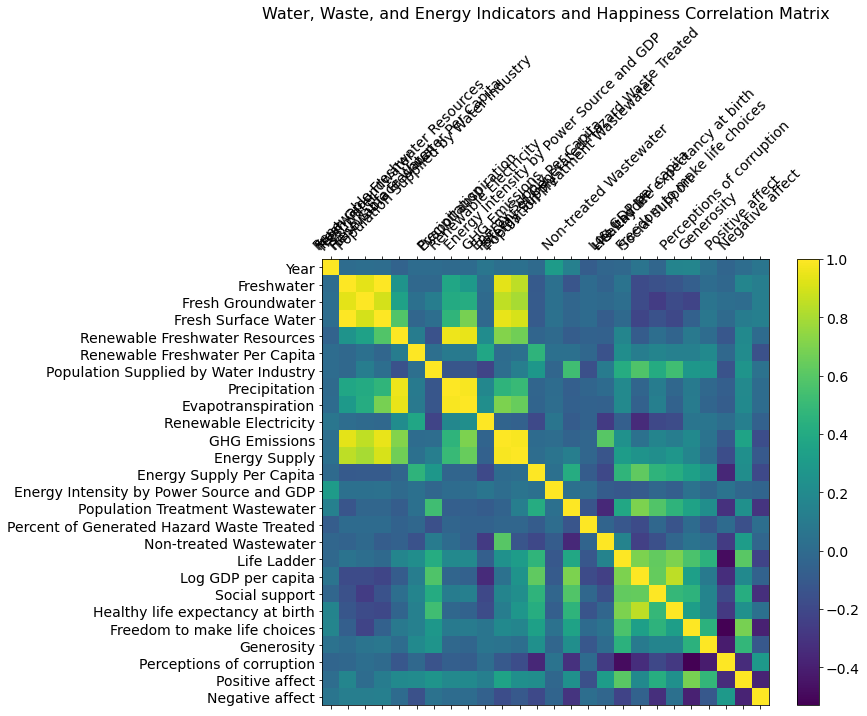

In [19]:
fig = plt.figure(figsize=(10, 8))
plt.matshow(mega_comp.corr(), fignum=fig.number)
plt.xticks(range(mega_comp.select_dtypes(['number']).shape[1]), mega_comp.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(mega_comp.select_dtypes(['number']).shape[1]), mega_comp.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Water, Waste, and Energy Indicators and Happiness Correlation Matrix', fontsize=16);

fig.savefig('Correlation Matrix.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [20]:
## Exploring correlation - Statistical Analysis of Correlations ##

In [68]:
## T-Tests for observable patterns above ##

stats.ttest_ind(water.dropna()['Population Supplied by Water Industry'], world_happi.dropna()['Freedom to make life choices'])
stats.ttest_ind(water.dropna()['Freshwater'], world_happi.dropna()['Freedom to make life choices'])

Ttest_indResult(statistic=27.419207328032268, pvalue=2.3829111399519983e-141)

In [70]:
stats.ttest_ind(energy.dropna()['Energy Supply Per Capita'], world_happi.dropna()['Freedom to make life choices'])
stats.ttest_ind(energy.dropna()['Energy Supply Per Capita'], world_happi.dropna()['Positive affect'])
stats.ttest_ind(energy.dropna()['Energy Supply'], world_happi.dropna()['Freedom to make life choices'])
stats.ttest_ind(energy.dropna()['GHG Emissions'], world_happi.dropna()['Positive affect'])

Ttest_indResult(statistic=15.299397111949032, pvalue=1.3988984589937292e-50)

In [23]:
stats.ttest_ind(waste.dropna()['Population Treatment Wastewater'], world_happi.dropna()['Life Ladder'])
stats.ttest_ind(waste.dropna()['Percent of Generated Hazard Waste Treated'], world_happi.dropna()['Life Ladder'])
stats.ttest_ind(waste.dropna()['Non-treated Wastewater'], world_happi.dropna()['Life Ladder'])
stats.ttest_ind(world_happi.dropna()['Positive affect'], world_happi.dropna()['Life Ladder'])

Ttest_indResult(statistic=-171.47315010978042, pvalue=0.0)

In [24]:
# Measuring correlations and building specific dataframes for comparison purposes


# # Corr Life Ladder and Population Supplied by Water Industry                   ## 0.41
# ll_pswi = mega_comp[['Country','Population Supplied by Water Industry','Year','Life Ladder','Freshwater']]
# ll_pswi_corr = ll_pswi.corr(method='pearson')


# # Corr Life Ladder and Energy Supply Per Capita                       ## 0.47
# ll_espc = mega_comp[['Country','Life Ladder','Year','Energy Supply Per Capita','Energy Supply']]
# ll_espc_corr = ll_espc.corr(method='pearson')

# # Corr Life Ladder and Population Treatment Wastewater                  ## 0.39
# ll_ptw = mega_comp[['Life Ladder','Population Treatment Wastewater','Percent of Generated Hazardous Waste Treated','Year']]
# ll_ptw_corr = ll_ptw.corr(method='pearson')

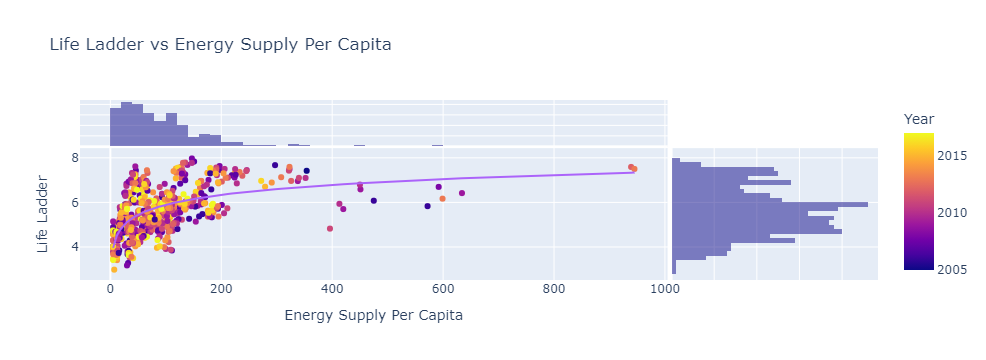

In [25]:
# Energy Supply PC and Happiness graph


fig = px.scatter(ll_espc.dropna(), x='Energy Supply Per Capita',y='Life Ladder',
                 marginal_x='histogram',marginal_y='histogram',color='Year', 
                 hover_data=['Country'], title="Life Ladder vs Energy Supply Per Capita", 
                 trendline="ols", trendline_options=dict(log_x=True))
fig.show()

# app = dash.Dash()
# app.layout = html.Div([
#     dcc.Graph(figure=fig)
# ])

# app.run_server(debug=True, use_reloader=False)


# fig.write_image('Energy Supply Per Capita Scatter Hist.png',engine='kaleido')
fig.write_html("visuals/Energy Supply Per Capita Scatter Hist.html")

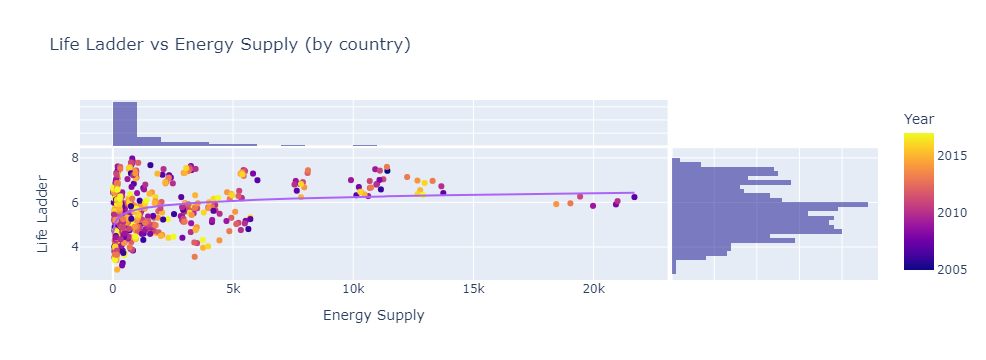

In [26]:
# Energy Supply (general) and Happiness graph

fig = px.scatter(ll_espc.dropna(), x='Energy Supply',y='Life Ladder',
                 marginal_x='histogram',marginal_y='histogram',color='Year', 
                 hover_data=['Country'], title="Life Ladder vs Energy Supply (by country)",
                trendline="ols", trendline_options=dict(log_x=True))
fig.show()

# fig.write_image('Energy Supply Per Capita Scatter Hist.png',engine='kaleido')
fig.write_html("visuals/Energy Supply Scatter Hist.html")

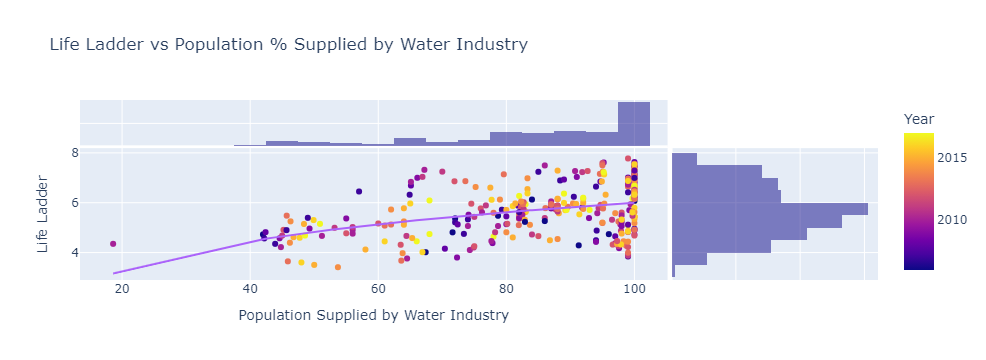

In [27]:
fig = px.scatter(ll_pswi.dropna(), x='Population Supplied by Water Industry',y='Life Ladder', 
                 marginal_x='histogram', marginal_y='histogram', color='Year', 
                 hover_data=['Country'], title= 'Life Ladder vs Population % Supplied by Water Industry',
                trendline="ols", trendline_options=dict(log_x=True))

fig.show()

fig.write_html("visuals/Pop Supp by Water Industry Scatter Hist.html")

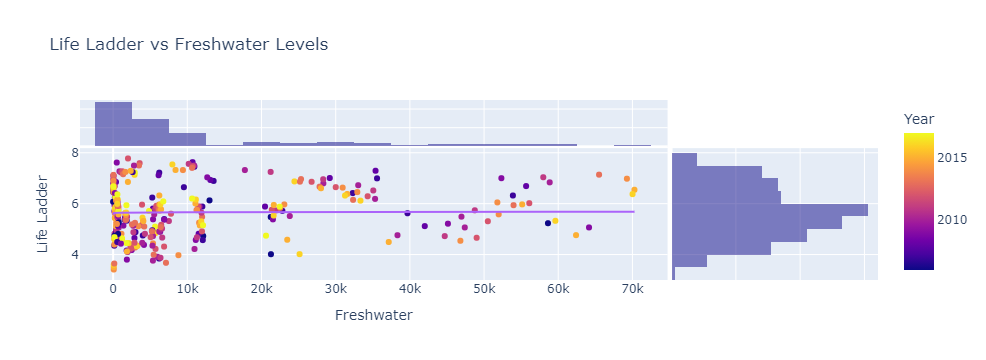

In [28]:
fig = px.scatter(ll_pswi.dropna(), x='Freshwater',y='Life Ladder', 
                 marginal_x='histogram', marginal_y='histogram', color='Year', 
                 hover_data=['Country'], title= 'Life Ladder vs Freshwater Levels',
                trendline="ols", trendline_options=dict(log_x=True))

fig.show()

fig.write_html("visuals/Freshwater Scatter Hist.html")

In [29]:
# Measure of happiness - correlations and qualitative assessment to decide best measure

happi_corr = world_happi.corr(method='pearson')                           # 0.61 coefficient with 'Freedom to make life choices'
happi_corr = happi_corr.loc[happi_corr['Positive affect'].abs() > .8]     # 0.53 coefficient with 'Life Ladder'
happi_corr

Year  Life Ladder  Log GDP per capita  Social support  \
Positive affect  0.018465     0.533092            0.296473        0.449969   

                 Healthy life expectancy at birth  \
Positive affect                          0.318886   

                 Freedom to make life choices  Generosity  \
Positive affect                      0.611673     0.37153   

                 Perceptions of corruption  Positive affect  Negative affect  
Positive affect                  -0.301383              1.0        -0.360361

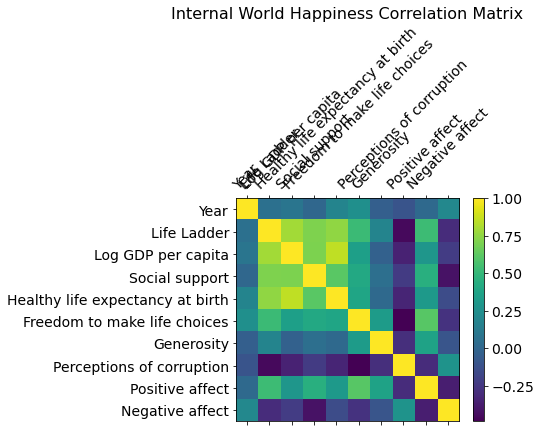

In [30]:
fworld_happi = plt.figure(figsize=(5, 4))
plt.matshow(world_happi.corr(), fignum=fworld_happi.number)
plt.xticks(range(world_happi.select_dtypes(['number']).shape[1]), world_happi.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(world_happi.select_dtypes(['number']).shape[1]), world_happi.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Internal World Happiness Correlation Matrix', fontsize=16);

In [31]:
# Visualizing relationships between positive affect and other happiness measures ^^

In [32]:
# Dividing population by Log GDP --- adding column to World Happiness Report

world_happi['Log GDP per capita'].describe()

count    1708.000000
mean        9.321709
std         1.158344
min         6.635000
25%         8.394000
50%         9.456500
75%        10.272000
max        11.648000
Name: Log GDP per capita, dtype: float64

In [33]:
## Tiers by LGDP percentile

conditions = [
    (world_happi['Log GDP per capita'] <= 8.394),
    (world_happi['Log GDP per capita'] > 8.394) & (world_happi['Log GDP per capita'] <= 9.4565),
    (world_happi['Log GDP per capita'] > 9.4565) & (world_happi['Log GDP per capita'] <= 10.272),
    (world_happi['Log GDP per capita'] > 10.272)
    ]

values = ['Low','Low-Mid','High-Mid','High']


world_happi.insert(4, 'LGDP Percentile', np.select(conditions, values), True)
world_happi.columns 

Index(['Country', 'Year', 'Life Ladder', 'Log GDP per capita',
       'LGDP Percentile', 'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [34]:
world_happi['LGDP Percentile'].astype(str)
world_happi['LGDP Percentile'].dtypes

dtype('O')

In [35]:
# Update mega compilation
mega_comp = reduce(lambda x,y: pd.merge(x,y,how='left',on=['Country','Year']), dfs)
mega_comp.columns

Index(['Country', 'Year', 'Freshwater', 'Fresh Groundwater',
       'Fresh Surface Water', 'Renewable Freshwater Resources',
       'Renewable Freshwater Per Capita',
       'Population Supplied by Water Industry', 'Precipitation',
       'Evapotranspiration', 'Renewable Electricity', 'GHG Emissions',
       'Energy Supply', 'Energy Supply Per Capita',
       'Energy Intensity by Power Source and GDP',
       'Population Treatment Wastewater',
       'Percent of Generated Hazard Waste Treated', 'Non-treated Wastewater',
       'Life Ladder', 'Log GDP per capita', 'LGDP Percentile',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [36]:
## Analyze again with log tiers ###  

## These dfs for reference to indicators while conducting: 

# ll_pswi = mega_comp[['Country','Population Supplied by Water Industry','Year','Life Ladder','LGDP Percentile']]
# ll_pswi_corr = ll_pswi.corr(method='pearson')

# ll_espc = mega_comp[['Country','Life Ladder','Year','Energy Supply Per Capita','Energy Supply','LGDP Percentile']]
# ll_espc_corr = ll_espc.corr(method='pearson')

# ll_ptw = mega_comp[['Life Ladder','Population Treatment Wastewater','Country','Year','LGDP Percentile']]
# ll_ptw_corr = ll_ptw.corr(method='pearson')

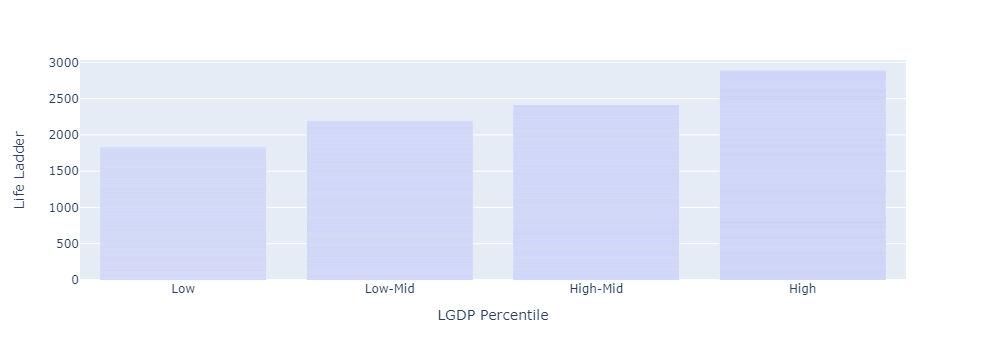

In [39]:
fig = px.bar(world_happi, x='LGDP Percentile', y='Life Ladder')
fig.show()


fig.write_html("visuals/LGDP LL Bar WH.html")

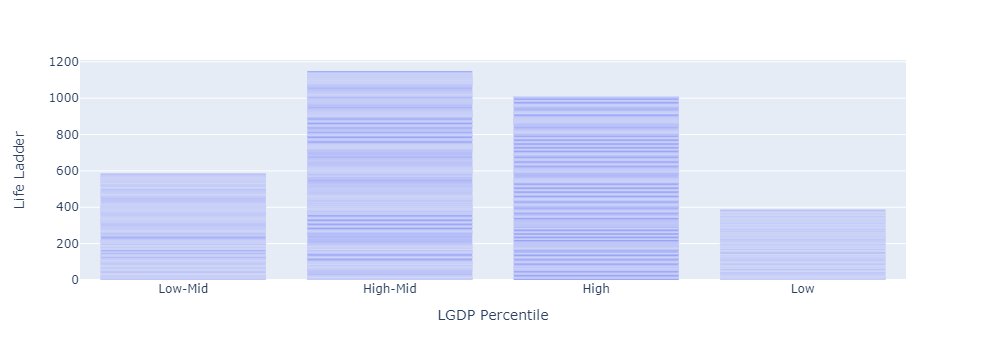

In [40]:
fig = px.bar(mega_comp, x='LGDP Percentile', y='Life Ladder')
fig.show()


fig.write_html("visuals/LGDP LL Bar WH.html")

In [41]:
# Focus on global indicator columns that showed 
# high correlation with global happiness columns. The pattern
# reveals that elements related to public services were more 
# impactful on overal human happiness in all three sectors
# than elements not related to individual use. 


#### First, inefficient method for column-specific correlational analysis
# Individual Resource DFs
energy_supp_pc = pd.concat([energy['Country'],energy['Year'],energy['Energy Supply Per Capita']],axis=1)
pop_supp_water = pd.concat([water['Country'],water['Year'],water['Population Supplied by Water Industry']],axis=1)
pop_treat_waste = pd.concat([waste['Country'],waste['Year'],waste['Population Treatment Wastewater']],axis=1)


# Neutral Counter DFs
energy_supp = pd.concat([energy['Country'],energy['Year'],energy['Energy Supply']],axis=1)
freshwater = pd.concat([water['Country'],water['Year'],water['Freshwater']],axis=1)
haz_was_treat = pd.concat([waste['Country'],waste['Year'],waste['Percent of Generated Hazard Waste Treated']],axis=1)

In [42]:
### Correlation analysis b/w 3 DFs: Ind, Neu, Happiness
water_corr = pd.merge(pop_supp_water, freshwater,how='left',on=['Country','Year'])
energy_corr = pd.merge(energy_supp_pc, energy_supp,how='left',on=['Country','Year'])
waste_corr = pd.merge(pop_treat_waste, haz_was_treat,how='left',on=['Country','Year'])

In [43]:
fig = px.scatter(mega_comp, x='Population Supplied by Water Industry', y='Life Ladder', hover_name='Country',
          animation_frame='Year', animation_group='Country', range_y=[0,8])


pyo.plot(fig, filename=r'visuals/ANIMATED.html')

'visuals/ANIMATED.html'

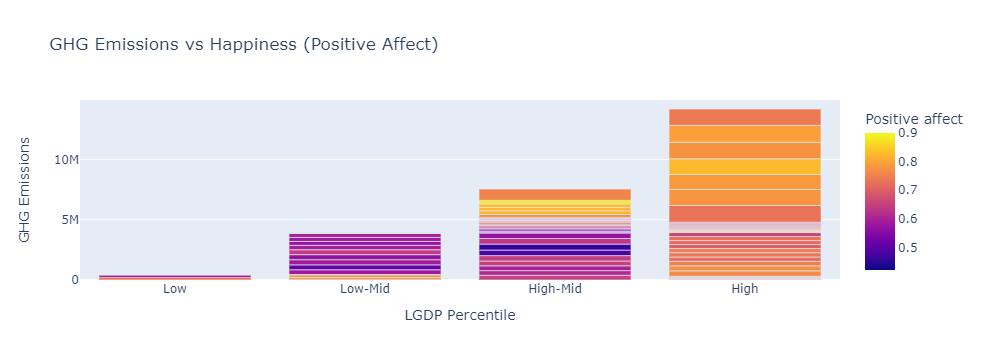

In [44]:
###  Comparative box plots  ###

import plotly.express as px

fig = px.bar(mega_comp, x="LGDP Percentile", y="GHG Emissions", color="Positive affect", 
             title='GHG Emissions vs Happiness (Positive Affect)', barmode="group",
             category_orders={"LGDP Percentile": ['Low','Low-Mid', 'High-Mid', 'High'],
                             })
fig.show()

fig.write_html('visuals/LGDP PosAf GHG Emis BAR.html')

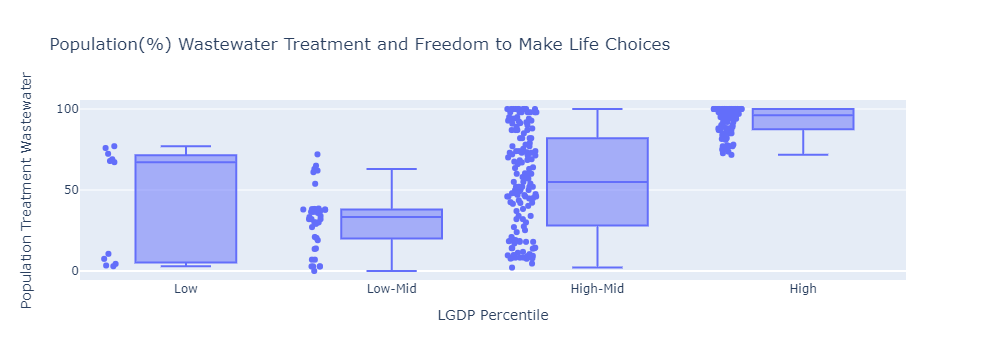

In [45]:
## WASTE CHARTs ##

# Can't include color that is not finite, makes separate boxes for each color category
fig = px.box(mega_comp, x="LGDP Percentile", y="Population Treatment Wastewater", 
             points="all",
            title="Population(%) Wastewater Treatment and Freedom to Make Life Choices", 
            category_orders={"LGDP Percentile": ['Low','Low-Mid', 'High-Mid', 'High']})
fig.show()

fig.write_html('visuals/LGDP PopW.html')

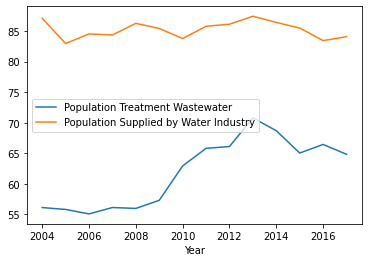

In [46]:
## Time trends --- creating code to make df around LGDPs ##

# df.groupby(['year_col', 'LGDP Percentile'])[['energy_supply_val_col']].mean()

fig = mega_comp.groupby(['Year'])[['Population Treatment Wastewater','Population Supplied by Water Industry']].mean().plot(kind='line')

plt.savefig('visuals/Pop Water Time Chart.jpg', dpi=100, format='jpg')

In [47]:
time_chart = mega_comp.groupby(['Year'])[['Year','Population Treatment Wastewater',
                        'Population Supplied by Water Industry',
                        'Freedom to make life choices','Positive affect','Life Ladder']].mean().dropna()
stats.ttest_ind(time_chart['Population Treatment Wastewater'], time_chart['Freedom to make life choices'])
stats.ttest_ind(time_chart['Population Treatment Wastewater'], time_chart['Population Supplied by Water Industry'])
stats.ttest_ind(time_chart['Population Supplied by Water Industry'], time_chart['Freedom to make life choices'])
stats.ttest_ind(time_chart['Population Supplied by Water Industry'], time_chart['Positive affect'])

Ttest_indResult(statistic=228.44586516378303, pvalue=1.4346419671923743e-41)

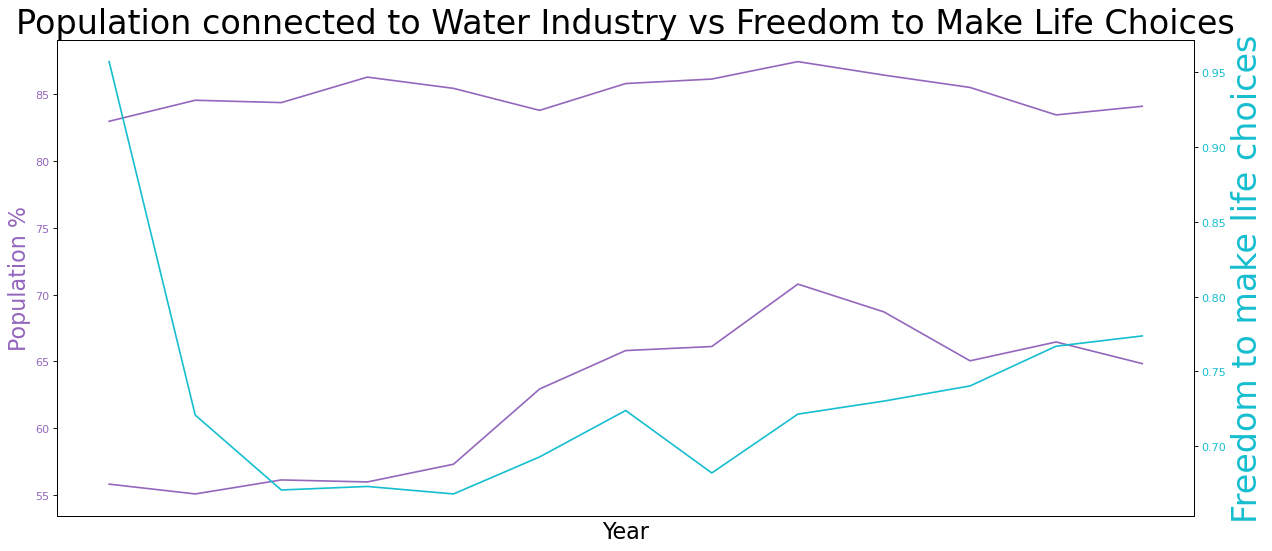

In [66]:
# adding secondary x and y axiseses

x = time_chart['Year']
y1 = time_chart['Population Treatment Wastewater']
y2 = time_chart['Population Supplied by Water Industry']
y3 = time_chart['Freedom to make life choices']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,7), dpi= 80)
ax1.plot(x, y1, y2, color='tab:purple')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y3, color='tab:cyan')

# ax1 (left y axis)
ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Population %', color='tab:purple', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:purple' )

# ax2 (right Y axis)
ax2.set_ylabel("Freedom to make life choices", color='tab:cyan', fontsize=30)
ax2.tick_params(axis='y', labelcolor='tab:cyan')
ax2.set_title("Population connected to Water Industry vs Freedom to Make Life Choices", fontsize=30)
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':20})
plt.tight_layout()

plt.savefig('visuals/PopWaterFreedomTimeChart.jpg', dpi=100, format='jpg')

plt.show()

In [50]:
mega_comp.columns

Index(['Country', 'Year', 'Freshwater', 'Fresh Groundwater',
       'Fresh Surface Water', 'Renewable Freshwater Resources',
       'Renewable Freshwater Per Capita',
       'Population Supplied by Water Industry', 'Precipitation',
       'Evapotranspiration', 'Renewable Electricity', 'GHG Emissions',
       'Energy Supply', 'Energy Supply Per Capita',
       'Energy Intensity by Power Source and GDP',
       'Population Treatment Wastewater',
       'Percent of Generated Hazard Waste Treated', 'Non-treated Wastewater',
       'Life Ladder', 'Log GDP per capita', 'LGDP Percentile',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [76]:
### Exploratory Pairwise Plots ###

import seaborn as sns

pairwise = mega_comp[['Year','Life Ladder', 'LGDP Percentile',
                      'Freedom to make life choices','Positive affect',
                      'Population Treatment Wastewater', 
                      'Percent of Generated Hazard Waste Treated',
                      'Non-treated Wastewater']]

pairwise_corr = pairwise.corr(method='pearson')
pairwise_corr.loc[pairwise_corr['Freedom to make life choices'].abs() > .5]     # 0.53 coefficient with 'Life Ladder'

Year  Life Ladder  \
Life Ladder                  -0.013035     1.000000   
Freedom to make life choices  0.167200     0.568597   
Positive affect               0.015981     0.608459   

                              Freedom to make life choices  Positive affect  \
Life Ladder                                       0.568597         0.608459   
Freedom to make life choices                      1.000000         0.684289   
Positive affect                                   0.684289         1.000000   

                              Population Treatment Wastewater  \
Life Ladder                                          0.390073   
Freedom to make life choices                         0.350447   
Positive affect                                      0.234991   

                              Percent of Generated Hazard Waste Treated  \
Life Ladder                                                   -0.117318   
Freedom to make life choices                                   0.004845   
Positive affect                                               -0.159149   

                              Non-treated Wastewater  
Life Ladder                                 0.151364  
Freedom to make life choices                0.050224  
Positive affect                             0.313415

C:\Users\hzeig\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\hzeig\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



<Figure size 800x640 with 0 Axes>

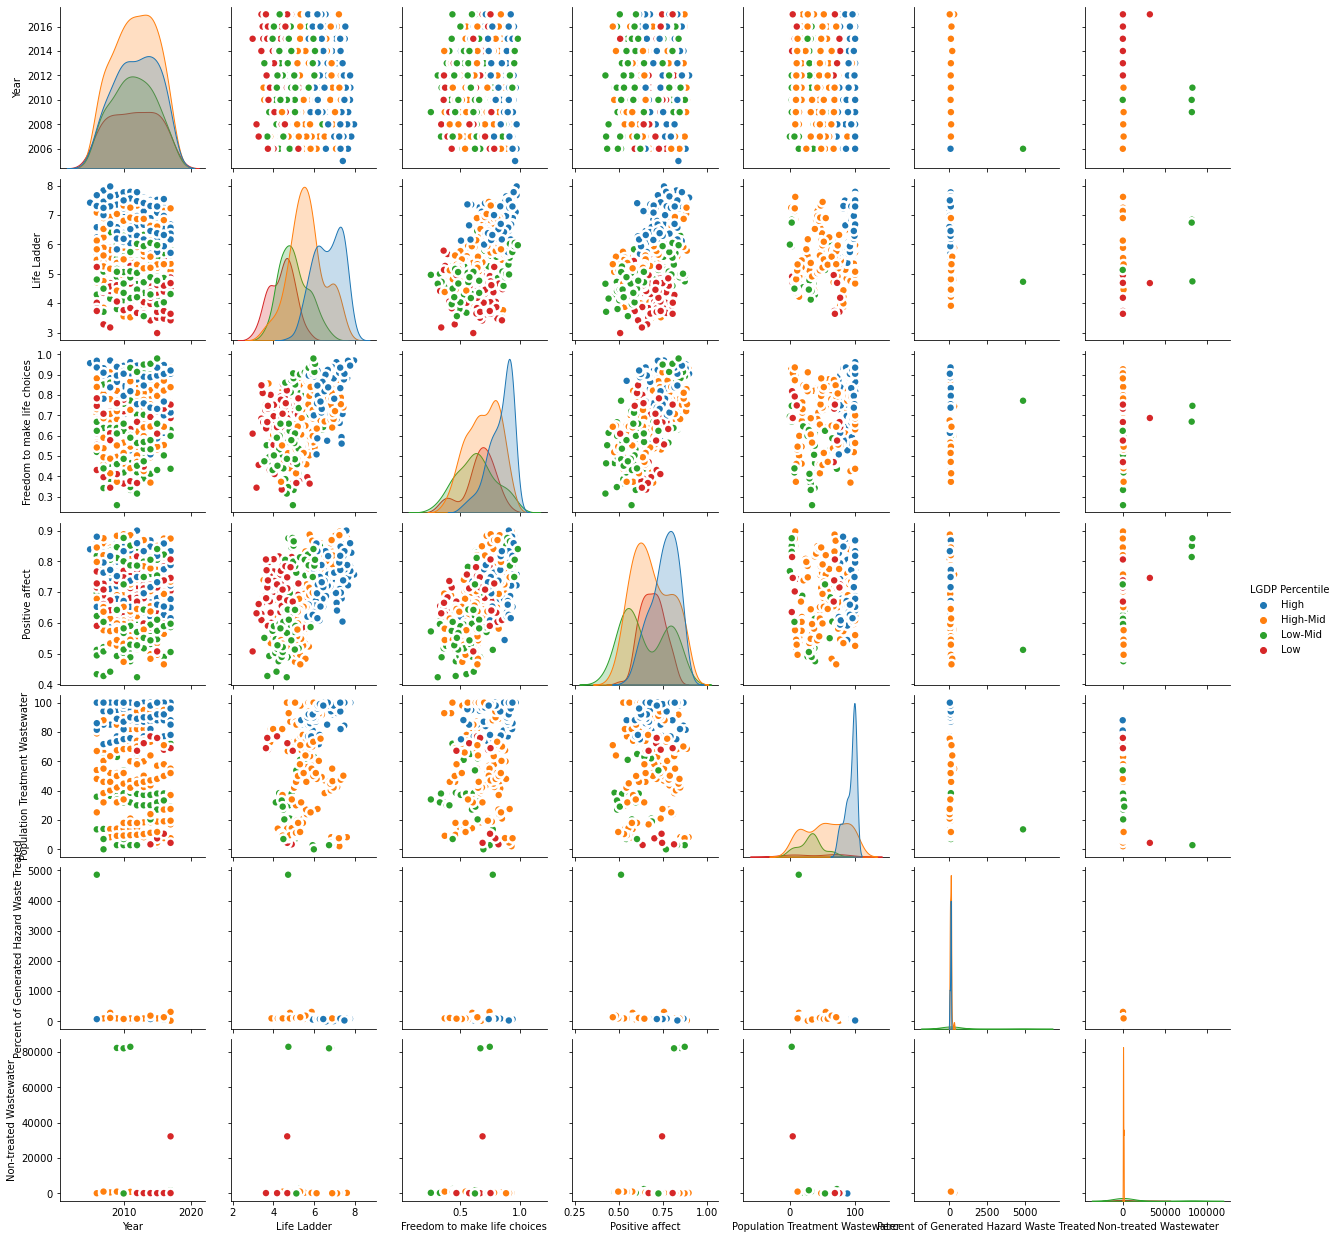

In [65]:
## Exploratory pairwise plotting
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(pairwise, kind="scatter", hue="LGDP Percentile",
             hue_order=['High', 'High-Mid', 'Low-Mid', 'Low'],
             plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))


plt.savefig('visuals/Pairwise WasHap.jpg', dpi=100, format='jpg')

plt.show()